In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams ['axes.labelsize'] = 16 
plt.rcParams ['xtick.labelsize'] = 14 
plt.rcParams ['ytick.labelsize'] = 14 
plt.rcParams ['legend.fontsize'] = 13

In [3]:
# Statsmodels is a Python module that provides classes and functions for the restimation of many different statistical models
import statsmodels.api as sm
#ARIMA is a more general model that include ARMA as a special case (AR-I-MA). #It has 3 parameters. To obtain an ARMA is enough to set the central parameter to zero.
from statsmodels.tsa.arima.model import ARIMA
# For Liung-Box test of autocorrelation.
from statsmodels.stats.diagnostic import acorr_ljungbox # For the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [4]:
S= pd.read_csv('synthetic_ARMA.csv') 
S.head()

,S1,S2
0,-0.004463,0.576042
1,-0.009984,1.046018
2,-0.009714,0.630641
3,-0.010939,0.108865
4,-0.023265,0.383786


In [5]:
s1, s2 = S['S1'].values,S ['S2'].values

Text(0.5, 0, '$t$')

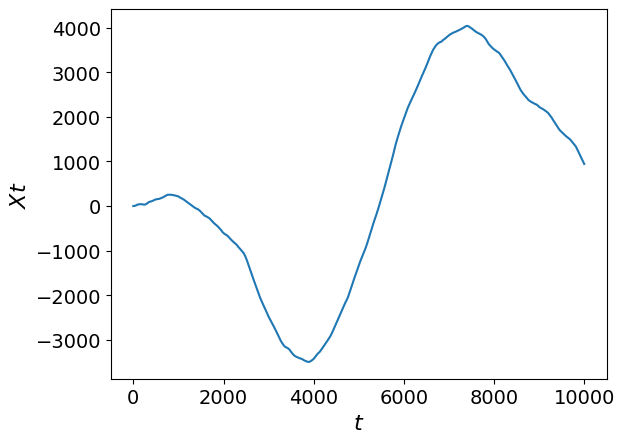

In [6]:
plt.plot (s1) 
plt.ylabel(r'$X t$')
plt.xlabel(r'$t$')

Text(0, 0.5, 'ACF [$X_t$]')

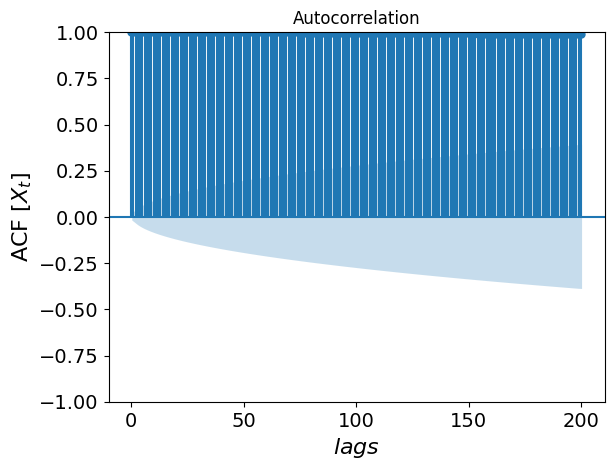

In [7]:
sm.graphics.tsa.plot_acf (s1,
lags=200)
plt.xlabel(r'$lags$') 
plt.ylabel ('ACF [$X_t$]')

In [8]:
adfuller(s1)

(-2.6645643672829555,
 0.08037345140943541,
 5,
 9994,
 {'1%': -3.4310044907347454,
  '5%': -2.8618292459530794,
  '10%': -2.566923960483154},
 -63471.6188904249)

In [9]:
s1 =np.diff(s1)

Text(0.5, 0, '$t$')

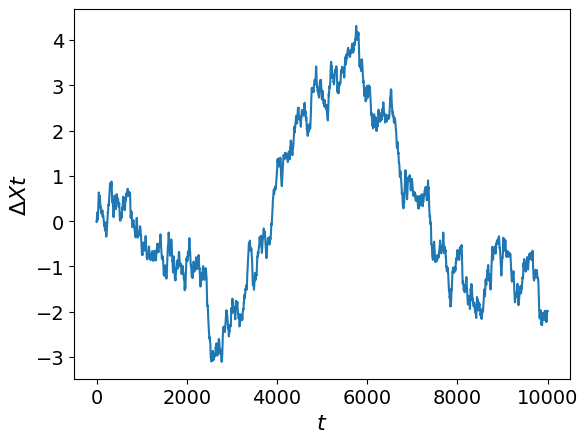

In [10]:
plt.plot (s1)
plt.ylabel(r'$\Delta X t$')
plt.xlabel(r'$t$')

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_63117/3844232079.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel ('ACF [$\Delta X_t$]')


Text(0, 0.5, 'ACF [$\\Delta X_t$]')

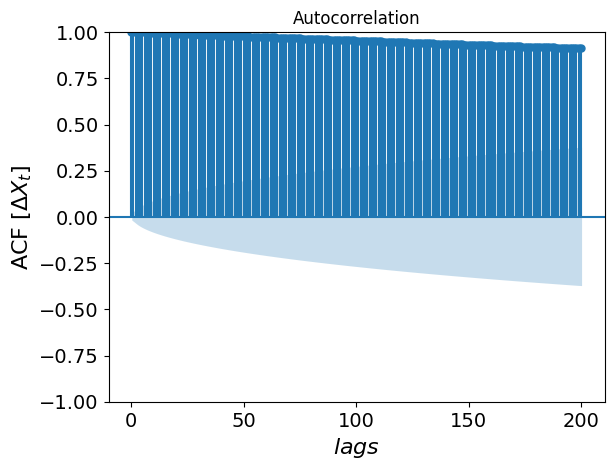

In [11]:
sm.graphics.tsa.plot_acf (s1, lags=200)
plt.xlabel(r'$lags$')
plt.ylabel ('ACF [$\Delta X_t$]')

In [12]:
adfuller(s1)

(-1.2334724988019807,
 0.6590335468119866,
 4,
 9994,
 {'1%': -3.4310044907347454,
  '5%': -2.8618292459530794,
  '10%': -2.566923960483154},
 -63459.64378612893)

In [13]:
s1 = np.diff (s1)

Text(0.5, 0, '$t$')

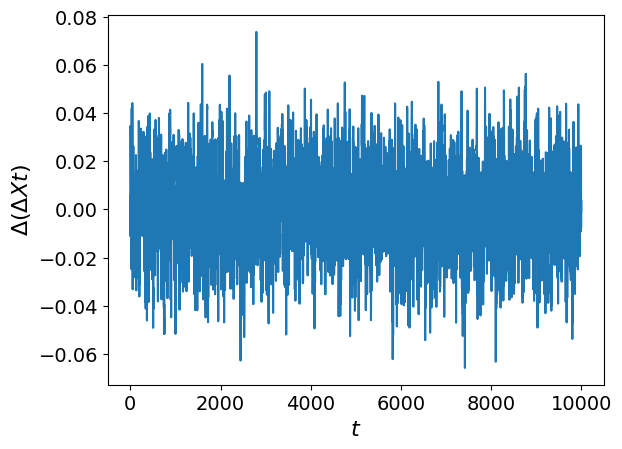

In [14]:
plt.plot(s1)
plt.ylabel (r'$\Delta (\Delta X t) $') 
plt.xlabel(r'$t$')

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/var/folders/5c/yxqnw4kx1bg4xfngl1_rcl0r0000gn/T/ipykernel_63117/298588999.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel ('ACF [$\Delta (\Delta X_t) $]')


Text(0, 0.5, 'ACF [$\\Delta (\\Delta X_t) $]')

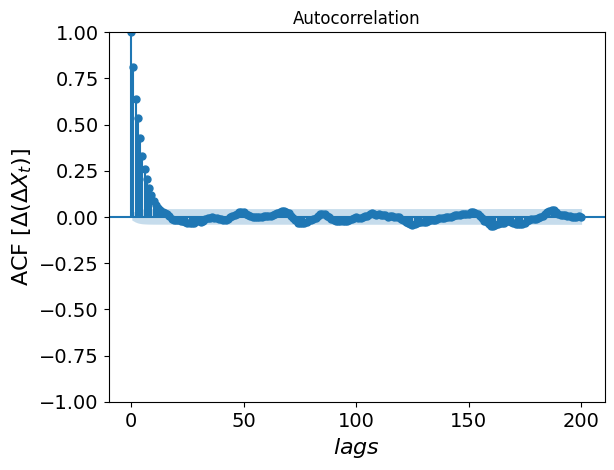

In [15]:
sm.graphics.tsa.plot_acf(s1,lags=200) 
plt.xlabel(r'$lags$')
plt.ylabel ('ACF [$\Delta (\Delta X_t) $]')

In [16]:
adfuller(s1)

(-29.209934466900926,
 0.0,
 3,
 9994,
 {'1%': -3.4310044907347454,
  '5%': -2.8618292459530794,
  '10%': -2.566923960483154},
 -63452.76165507524)

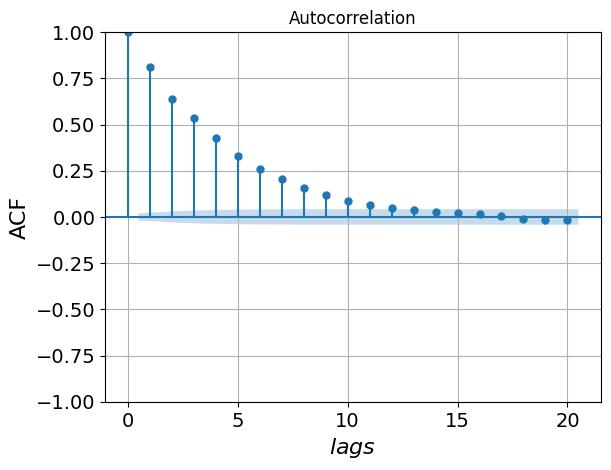

In [17]:
sm.graphics.tsa.plot_acf(s1, lags=20) 
plt.xlabel (r'$lags$')
plt.ylabel ('ACF')
plt. grid()

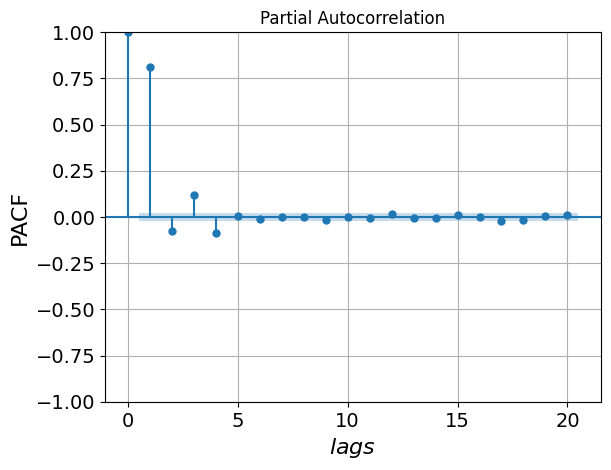

In [18]:
sm.graphics.tsa.plot_pacf (s1,lags=20)
plt.xlabel(r'$lags$') 
plt.ylabel ('PACF')
plt.grid()

In [19]:
models = [(4,0), (1,1), (2,1), (1,2), (2,2)]

In [20]:
# I create a diction with the result of the fits
M={}
for p,q in models: #fit an arma
    print(p,q)
    ft = ARIMA (s1, order= (p,0,q)).fit()
    M[p,q] =ft

4 0
1 1
2 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2
2 2


In [21]:
#The result of the fi t is an object with some methods.
#For example summary. But you can access individual elements also.

M[(2,1)].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9998
Model:                 ARIMA(2, 0, 1)   Log Likelihood               31825.190
Date:                Tue, 15 Jul 2025   AIC                         -63640.380
Time:                        18:48:35   BIC                         -63604.330
Sample:                             0   HQIC                        -63628.177
                               - 9998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.401      0.689      -0.001       0.001
ar.L1          0.2445      0.042      5.838      0.000       0.162       0.327
ar.L2          0.4263      0.036     11.825      0.000       0.356       0.497
ma.L1          0.6723      0.038     17.785      0.000       0.598       0.746
sigma2         0.0001   1.43e-06     70.291      0.000    9.77e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   4.35   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.04   Prob(JB):                         0.63
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
AIC = pd.DataFrame([((p,q) ,ft.aic) for (p,q) ,ft in M.items ()], columns= ['model', 'AIC'] )
AIC


,model,AIC
0,"(4, 0)",-63698.956085
1,"(1, 1)",-63507.870989
2,"(2, 1)",-63640.380222
3,"(1, 2)",-63652.905305
4,"(2, 2)",-63676.352739


In [23]:
#We are not insterested in the absolute value but in de difference with the minimum values
AIC = AIC.assign (dAIC= (AIC.AIC - AIC.AIC.min())) 
AIC. sort_values('AIC')

,model,AIC,dAIC
0,"(4, 0)",-63698.956085,0.000000
4,"(2, 2)",-63676.352739,22.603346
3,"(1, 2)",-63652.905305,46.050780
2,"(2, 1)",-63640.380222,58.575863
1,"(1, 1)",-63507.870989,191.085096


In [24]:
p,q = AIC.model[0]

In [25]:
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9998
Model:                 ARIMA(4, 0, 0)   Log Likelihood               31855.478
Date:                Tue, 15 Jul 2025   AIC                         -63698.956
Time:                        18:48:35   BIC                         -63655.695
Sample:                             0   HQIC                        -63684.312
                               - 9998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.381      0.704      -0.001       0.001
ar.L1          0.8957      0.010     90.034      0.000       0.876       0.915
ar.L2         -0.1960      0.013    -15.074      0.000      -0.222      -0.171
ar.L3          0.1954      0.013     14.732      0.000       0.169       0.221
ar.L4         -0.0873      0.010     -8.854      0.000      -0.107      -0.068
sigma2      9.999e-05   1.42e-06     70.191      0.000    9.72e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.96   Prob(JB):                         0.61
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Fit hte ARIMA (4, 0, 0) model without a constant term 
model_ar4_no_const = ARIMA(s1, order= (4, 0, 0), trend = 'n' )
results_ar4_no_const = model_ar4_no_const.fit()
results_ar4_no_const.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9998
Model:                 ARIMA(4, 0, 0)   Log Likelihood               31855.405
Date:                Tue, 15 Jul 2025   AIC                         -63700.810
Time:                        18:48:36   BIC                         -63664.759
Sample:                             0   HQIC                        -63688.607
                               - 9998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8957      0.010     90.046      0.000       0.876       0.915
ar.L2         -0.1960      0.013    -15.074      0.000      -0.222      -0.171
ar.L3          0.1954      0.013     14.733      0.000       0.169       0.221
ar.L4         -0.0873      0.010     -8.854      0.000      -0.107      -0.068
sigma2      9.999e-05   1.42e-06     70.204      0.000    9.72e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.96   Prob(JB):                         0.61
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
results_ar4_no_const.aic-M[4,0].aic

-1.8534663000100409

In [28]:
r = results_ar4_no_const.resid

Text(0, 0.5, 'ACF [residue]')

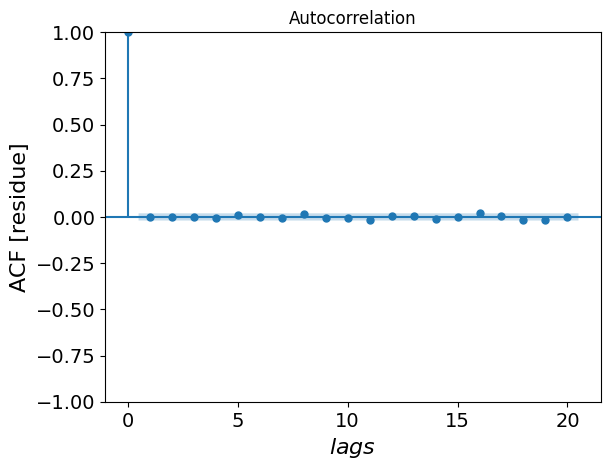

In [29]:
#Let us plot the ACF. If the model is correct ew should expect something uncorrelated.
sm.graphics.tsa.plot_acf(r,lags=20) 
plt.xlabel(r'$lags$')
plt. ylabel ('ACF [residue]')

In [30]:
acorr_ljungbox(r,lags=range (p+q+10) ,model_df=p+q,return_df=True)

,lb_stat,lb_pvalue
0,7.025563,NaN
1,0.002549,NaN
2,0.037542,NaN
3,0.070535,NaN
4,0.433243,NaN
5,1.129261,0.287933
6,1.173958,0.556004
7,1.558530,0.668829
8,4.059222,0.398050
9,4.506265,0.479046
